# LAB 2 (var 1)
### Babushkin A.M. + Krokhin R.O.

In [36]:

import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## TASK 1

9.920541136120097
9.856780717385885
9.916571395836959
9.923225015119217
9.951130619145832
9.934634378727441
9.916481917001628
9.919070730071198
9.949261900658144
9.942214195048695


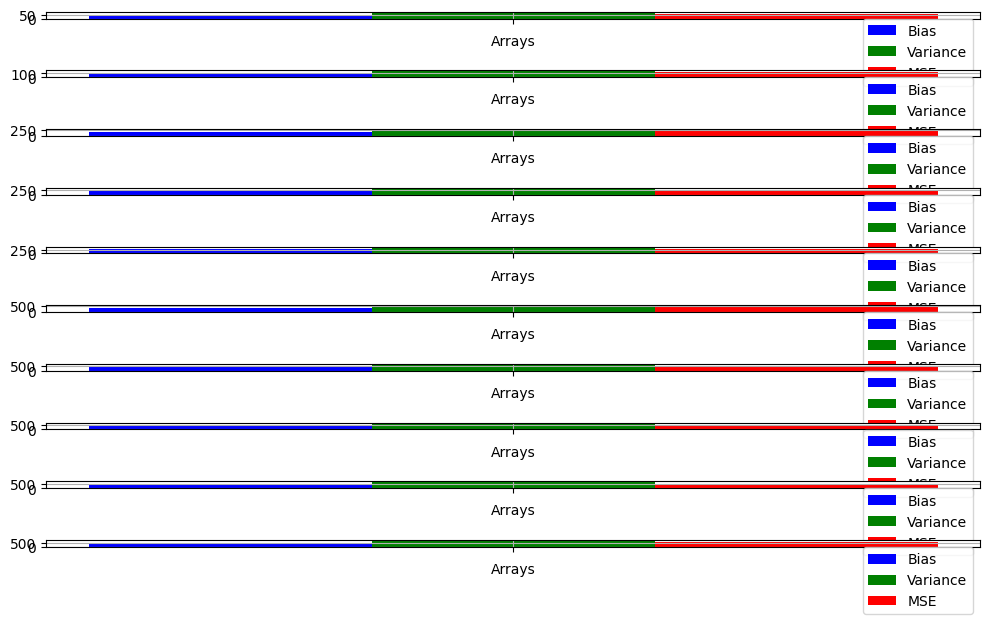

In [37]:
def grade(samples, n):
    thetas, bias, vars, mses = [0] * n, [0] * n, [0] * n, [0] * n
    for i in range(n):
        thetas[i] = (np.sqrt(3*np.var(samples[i])))
        bias[i] = abs(thetas[i] - 10)
        vars[i] = abs(np.var(samples[i]) - np.var(samples, ddof=1))
        mses[i] = np.mean((thetas[i]-10)**2)
    return thetas, bias, vars, mses

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 6))

for n in range(100, 1001, 100):
    samples = np.random.uniform(low=-10, high=10, size=(n, 100))
    thetas, bias, vars, mses = grade(samples, n)
    
    print(np.mean(thetas))
    
    count_bias = []
    count_vars = []
    count_mses = []
    
    count_bias.append(sum(1 for value in bias if value > 0.3))
    count_vars.append(sum(1 for value in vars if value > 0.5))
    count_mses.append(sum(1 for value in mses if value > 0.05))

    labels = ['']
    x = np.arange(len(labels))
    width = 0.25

    ax[n//100-1].bar(x - width, count_bias, width, color='blue', label='Bias')
    ax[n//100-1].bar(x, count_vars, width, color='green', label='Variance')
    ax[n//100-1].bar(x + width, count_mses, width, color='red', label='MSE')

    ax[n//100-1].set_xlabel('Arrays')
    ax[n//100-1].set_xticks(x)
    ax[n//100-1].set_xticklabels(labels)
    ax[n//100-1].legend()
    ax[n//100-1].grid(True)

plt.tight_layout()
plt.show()

## TASK 2

In [39]:
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def posterior_pdf(x, mu, sigma):
    return (normal_pdf(x, mu, sigma)) / marginal_likelihood(mu, sigma)

def marginal_likelihood(mu, sigma):
    return 1

def bayesian_estimate(x, mu, sigma):
    posterior_mean = np.mean(x)
    return posterior_mean

# Пример использования
x = np.random.normal(0, 1, 100)
mu = 0
sigma = 1

theta_estimate = bayesian_estimate(x, mu, sigma)

print(f"Байесовская оценка параметра тетта: {theta_estimate}")


Байесовская оценка параметра тетта: 0.13491574791735952
